
# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil.  I will be analyzing this dataset to try and gain some insight into what factors may affect whether or not a patient will show up for their appointment. A number of characteristics about the patient are included in each row.  I will focus specifically on gender, appointtment day of the week, and whether or not the patient has insurance.

>Questions that I will be trying to gain insight on from this dataset are... 

>Does gender make a person more or less likely to show up for their appointment?

>Does the day of the week show a relation to no show appointments?

>Does having scholarship affect if a person will show up for their appointment?


In [58]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
# Data Wrangling and Cleaning

In [59]:
def makeTimeDate (df, type_day):
    #This function will take the dataframe and a string to identify the column, 
    #to change a date with type str to a DateTime datatype
    df[type_day] =  df[type_day].str.extract('(\d+-+\d+-+\d\d)')
    df[type_day] = pd.to_datetime( df[type_day])
    


In [60]:
#Load data from source
df = pd.read_csv("/Users/laurenthom/Desktop/Case Study 1/noshowappointments.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [61]:
df.shape

(110527, 14)

I am going to drop the columns that I am not useing to clean up the dataset.

In [62]:
df.drop(["Age", "Neighbourhood", "Hipertension", "Diabetes", "Alcoholism", "Handcap", "SMS_received"], axis=1, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Scholarship,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,0,No


I am going to change the column "No-show" to "No_show". This is because sometimes hyphens can cause issues in your program.  The use of underscores is better to prevent issues down the road.

In [63]:
#convert "No-show" column name intot a more usable format
df.rename(columns={"No-show":"No_show"}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Scholarship,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,0,No


I am going to convert datatypes for AppointmentDay and ScheduleDay into a more readable format.
Addditionally, I will extract only the date (not tthe time) and put into datetime format so that I can run dateime functions on the data if needed. 

In [64]:
#Convert datatypes for Appointment day and Schedule day into more readable format
#Extract only the date and put into datetime format
makeTimeDate(df,'AppointmentDay')

In [65]:
#check to make sure type has changed
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay              object
AppointmentDay    datetime64[ns]
Scholarship                int64
No_show                   object
dtype: object

In [66]:
#Extract only the date and put into datetime format
makeTimeDate(df,'ScheduledDay')

#check to make sure change has happened
df.dtypes



PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Scholarship                int64
No_show                   object
dtype: object

In [67]:
#Check to see if any duplicated data
sum(df.duplicated())

0

> The data types have been changed in order to evaluate data effectivly.  There is no duplicated data in this dataset.  Now that the dataset has been cleaned, I will address the three questions from the introduction of this analysis.

<a id='Exploratory Data Analysis'></a>
# Exploratory Data Analysis



### Does gender make a person more or less likely to show up for an appointment?

In [68]:
#group patients by gender and get count
df_gender = df.groupby('Gender').count()['No_show']

#get a count of total patients that have missed their appointments
df_missed = df.query('No_show == "Yes"')

#Of the patients that have missed, group by gender and return a count for each group
df_gender_missed = df_missed.groupby("Gender").count()['No_show']

#get proportions of females that have missed from total females with appointments
female_pro_missed = df_gender_missed["F"]/ df_gender["F"]
print("Female:", female_pro_missed)
#get proportions of males that have missed from total males with appointments
male_pro_missed = df_gender_missed["M"]/ df_gender["M"]
print("Male:", male_pro_missed)



Female: 0.20314587973273943
Male: 0.19967947889471915


Text(0.5, 0, 'Gender')

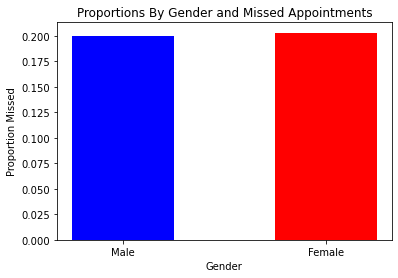

In [69]:
#Make a bar chart of findings
colors = ['b', 'r']
width = .35
plt.bar(["Male", "Female"], [male_pro_missed, female_pro_missed], color = colors, width=.5, align='center')
plt.title('Proportions By Gender and Missed Appointments')
plt.ylabel('Proportion Missed')
plt.xlabel('Gender')


The bar chart shows that there are slightly more females that miss their appointments than males.

### Does the day of the week show a relation to no show appointments??

I will calculate the day of the week for each appointment day based on the date and get a count for each day.

In [70]:
#create a column with name of day of the week
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x: x.strftime("%Y/%m/%d"))
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x: pd.Timestamp(x))
#add name of day to the dataframe
df['AppointmentDayName'] = df['AppointmentDay'].apply(lambda x : x.day_name())

day_total = df.groupby("AppointmentDayName").count()['PatientId']
day_total


AppointmentDayName
Friday       19019
Monday       22715
Saturday        39
Thursday     17247
Tuesday      25640
Wednesday    25867
Name: PatientId, dtype: int64

I will calculate the number of missed appointments per day of the week and find a percentage of missed appointments for each day by dividing the number of missed appointments on that day by the total number of that day of the week.  

In [71]:
#get the number of missed appointments for each day
days_missed = df.query("No_show == 'Yes'")
missed_day_counts = days_missed.groupby(["AppointmentDayName", 'No_show']).count()["PatientId"]
missed_day_counts

#get the number of appointments per day
day_total = df.groupby("AppointmentDayName").count()["PatientId"]
day_total

#calculate proportions of missed appointments per day
day_pro = missed_day_counts/day_total

day_pro = (day_pro[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']])

day_pro


AppointmentDayName  No_show
Monday              Yes        0.206471
Tuesday             Yes        0.200936
Wednesday           Yes        0.196892
Thursday            Yes        0.193541
Friday              Yes        0.212261
Saturday            Yes        0.230769
Name: PatientId, dtype: float64

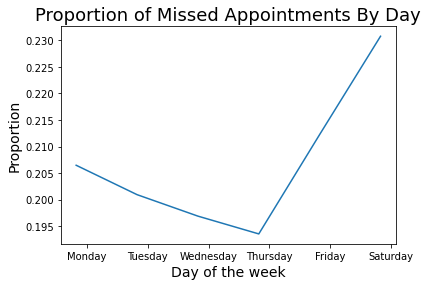

In [72]:
#plot on a line chart the calculations
ind = np.arange(len(day_pro))
width= .35
plt.plot(ind, day_pro)
plt.title('Proportion of Missed Appointments By Day', fontsize = 18)
plt.ylabel('Proportion', fontsize = 14)
plt.xlabel('Day of the week', fontsize = 14)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
locations = ind + width/2
plt.xticks(locations, labels)
plt.show()



The line graph created shows that less appointments are missed in the middle of the week than towards the beinging and end of the week.  You can also see that there is a large amount of appointments missed on Saturdays compared to other days of the week.

# Does having scholarship affect if a person will show up for their appointment?


First, I am going to calculate the number of people that have scholarship and those that do not and place them in seperate variables as a group.  I will then look at the number of people that missed their appointment in each group.  Finally, I will calculate a percentage of missed appointments for each group.

In [73]:
#calculate number of people without scholarship
no_scholarship = df.query('Scholarship == 0')
no_scholarship
#calculate number of people that have scholarship
has_scholarship = df.query('Scholarship == 1')
has_scholarship

#calculate number of people without scholarship that have missed their appointment
num_ns_missed = no_scholarship.query('No_show == "Yes"').count()['PatientId']
num_ns_missed

#calculate number of people with scholarship that have missed their appointment
num_hs_missed = has_scholarship.query('No_show == "Yes"').count()['PatientId']

#find the percent of missed appointments for each group
hs_percent = (num_hs_missed/has_scholarship.count()*100)['PatientId']
hs_percent

ns_percent = (num_ns_missed/no_scholarship.count()*100)['PatientId']
hs_percent, ns_percent

(23.73630420771568, 19.807155900708366)

I will place my calculations in a bar chart.

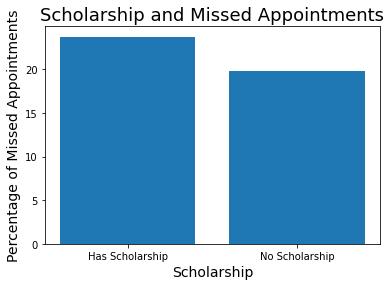

In [74]:
groups = ['Has Scholarship', 'No Scholarship']
ind = [hs_percent, ns_percent]
width= .35
bars = plt.bar(groups, ind)
plt.title('Scholarship and Missed Appointments', fontsize=18)
plt.ylabel('Percentage of Missed Appointments', fontsize = 14)
plt.xlabel('Scholarship', fontsize = 14)


plt.show()



The bar graph shows that people who have scholarship tend to miss more appointments than those that do not have scholarship.

<a id='conclusions'></a>
## Conclusions

>This dataset included data from 100k medical appointments in Brazil.  As I examined this dataset, I focused on three main  questions to gain insight on what factors may affect whether or not patients show up for their appointment. 
My first question asked if gender had an affect on whether or not a patient would show up for their appointment.  My research shows slightly more females miss their appointments than males in Brazil. The size of the dataset was large with the data coming from 100k records.  However, I would need to run a full statistical anaylysis to see if the difference in significant or not.  Based on my research, gender may have an affect on a person not showing for their appointment.
My second question asked if there was a relation between the day of the week the appointment was on and a person not showing up to their appointment.  My research shows that there are more people that do not show up for their appointment on Saturday.  There are the least amount of "No Show" appointments on Thursday.  
My third question asks if a person having "scholarship" (health insurance) is related to them showing up for their appointment.  My research shows that more people with scholarship do not show up for their appointment than those that do not have scholarship.  I find this interesting as it was not what I expected to see.  I would dhave expected that having scholarship would have eased the financial burden on the individual and therefore made them more likely to show for their appointment.  
Based on my research, I can see that there may be a correlation between each of the three variables that I looked at for each person and their likelyhood to show up for their medical appointment. However, I would like to run statistical analysis on all three variables of my research findings to see if the discrepancies that I found are statistically significant. 



### Limitatitons

Some of the limitations that I encountered concern the way data was recorded and missing information on the client. 
In regards to how the data was recorded, I found it confusing to record a "No Show" appointment as "yes" if the patient did not show for the appointment and "no" if they did show for their appointment. The use of a double negative ("no" for "No-show") made the interpretation of the data confusing at times.  I would have recorded the value as "Show" and documented it as true or false with the value being true if the patient did show for their appointment.
I think it would dprovide more insight into the habits of each patient if we had more information on their daily lives.  For example, are they employed, are they caretakers, how far the medical center from where they live, how do most people travel to the clinic (bus, by foot, car, etc).  This could provide more insight on the "why" behind the "No_show" appointments by giving a clue as to what may be a hinderance for each patient.